In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns

data = pd.read_csv("Data_EDAS/ufc-master.csv")

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Columns: 119 entries, R_fighter to b_ko_odds
dtypes: bool(1), float64(58), int64(46), object(14)
memory usage: 4.4+ MB


,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,...,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4895.000000,4896.000000,4895.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,3966.000000,4131.000000,...,95.000000,35.000000,4274.000000,4274.000000,4093.000000,4077.000000,3847.000000,3835.000000,3847.000000,3834.000000
mean,-117.640449,66.030637,94.827397,167.083323,3.181985,0.477941,0.875408,0.010621,26.308553,0.444741,...,8.473684,9.485714,2.408049,652.313758,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173
std,268.881452,247.803928,82.843409,136.944643,0.571515,0.769386,1.311379,0.108333,20.935885,0.121332,...,4.259763,4.300283,0.996643,357.911423,230.583958,306.571299,550.126761,627.285034,413.622768,458.846643
min,-1700.000000,-1200.000000,5.882353,8.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-275.000000
25%,-255.000000,-145.000000,39.215686,68.965517,3.000000,0.000000,0.000000,0.000000,5.610000,0.387500,...,5.000000,5.000000,1.000000,297.000000,167.000000,225.000000,435.000000,590.000000,240.000000,325.000000
50%,-150.000000,130.000000,66.666667,130.000000,3.000000,0.000000,0.000000,0.000000,24.759615,0.450000,...,8.000000,10.000000,3.000000,900.000000,250.000000,349.000000,720.000000,975.000000,435.000000,548.500000
75%,126.500000,220.000000,126.500000,220.000000,3.000000,1.000000,1.000000,0.000000,39.075000,0.510000,...,12.000000,13.500000,3.000000,900.000000,400.000000,525.000000,1200.000000,1400.000000,700.000000,880.750000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2200.000000,2600.000000,4665.000000,4785.000000,2675.000000,3200.000000


In [29]:
#data.head()
data['date']

0       2021-10-02
1       2021-10-02
2       2021-10-02
3       2021-10-02
4       2021-10-02
           ...    
4891     3/21/2010
4892     3/21/2010
4893     3/21/2010
4894     3/21/2010
4895     3/21/2010
Name: date, Length: 4896, dtype: object

In [30]:
data['country'].value_counts()

country
 USA                     2450
USA                       599
 Brazil                   400
 Canada                   337
 United Kingdom           165
 Australia                160
United Arab Emirates      141
 Sweden                    72
 Mexico                    70
 China                     61
 Germany                   54
 Japan                     53
 Singapore                 45
 Russia                    36
 New Zealand               33
 United Arab Emirates      29
 Netherlands               25
 South Korea               24
 Poland                    23
 Ireland                   19
 Croatia                   13
 Czech Republic            13
 Denmark                   13
 Chile                     13
 Uruguay                   13
 Philippines               12
 Argentina                 12
Brazil                     11
Name: count, dtype: int64

In [31]:
data['location'].value_counts()

location
Las Vegas, Nevada, USA                        1251
Abu Dhabi, Abu Dhabi, United Arab Emirates     153
Houston, Texas, USA                             82
Chicago, Illinois, USA                          80
Newark, New Jersey, USA                         79
                                              ... 
Bangor, Maine, USA                              10
Hollywood, Florida, USA                          9
Gold Coast, Queensland, Australia                9
Omaha, Nebraska, USA                             9
Ledyard, Connecticut, USA                        9
Name: count, Length: 145, dtype: int64

In [32]:
data['Winner'].value_counts()

Winner
Red     2859
Blue    2037
Name: count, dtype: int64

In [33]:
data['finish_details'].value_counts()

finish_details
Punch                 507
Punches               467
Rear Naked Choke      331
Guillotine Choke      146
Kick                  119
Armbar                 95
Knee                   67
Elbows                 60
Arm Triangle           58
Triangle Choke         46
Elbow                  30
D'Arce Choke           26
Kimura                 21
Flying Knee            20
Knees                  16
Other - Choke          14
Anaconda Choke         14
Kneebar                12
Heel Hook              11
Spinning Back Fist      6
Slam                    6
Spinning Back Kick      6
Neck Crank              5
Other - Lock            5
North-South Choke       4
Injury                  3
Omoplata                2
Kicks                   2
Ankle Lock              1
Peruvian Necktie        1
Keylock                 1
Name: count, dtype: int64

In [34]:
data.shape

(4896, 119)

In [35]:
data.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)

<Axes: title={'center': 'paises mas populares'}, xlabel='country'>

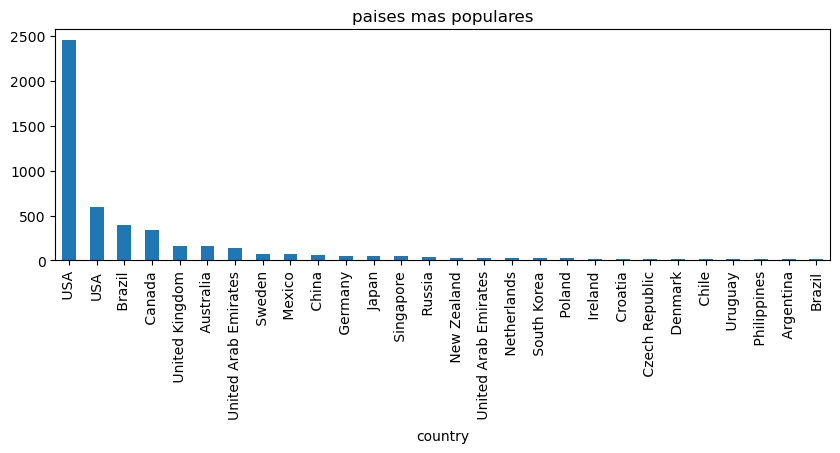

In [36]:
data['country'].value_counts().plot(kind='bar', title='paises mas populares',figsize=(10,3))

In [37]:
clean_data = data.drop(['B_wins','B_Stance','R_draw','R_avg_SIG_STR_landed','R_avg_SIG_STR_pct','R_avg_SUB_ATT','R_avg_TD_landed','R_avg_TD_pct','R_total_rounds_fought','R_total_title_bouts','R_win_by_Decision_Majority','R_win_by_Decision_Unanimous','R_win_by_TKO_Doctor_Stoppage','R_Stance','R_Height_cms','total_round_dif','total_title_bout_dif','ko_dif','sub_dif','height_dif','sig_str_dif','avg_sub_att_dif','avg_td_dif','empty_arena','constant_1','B_match_weightclass_rank','R_match_weightclass_rank','R_Heavyweight_rank','R_Light Heavyweight_rank','R_Middleweight_rank','R_Welterweight_rank','R_Lightweight_rank','R_Featherweight_rank','R_Bantamweight_rank','R_Flyweight_rank','R_Pound-for-Pound_rank','B_Heavyweight_rank','B_Light Heavyweight_rank','B_Middleweight_rank','B_Welterweight_rank','B_Lightweight_rank','B_Featherweight_rank','B_Bantamweight_rank','B_Flyweight_rank','B_Pound-for-Pound_rank','better_rank','finish','finish_details','finish_round','finish_round_time','total_fight_time_secs','r_dec_odds','b_dec_odds','r_sub_odds','b_sub_odds'], axis=1)

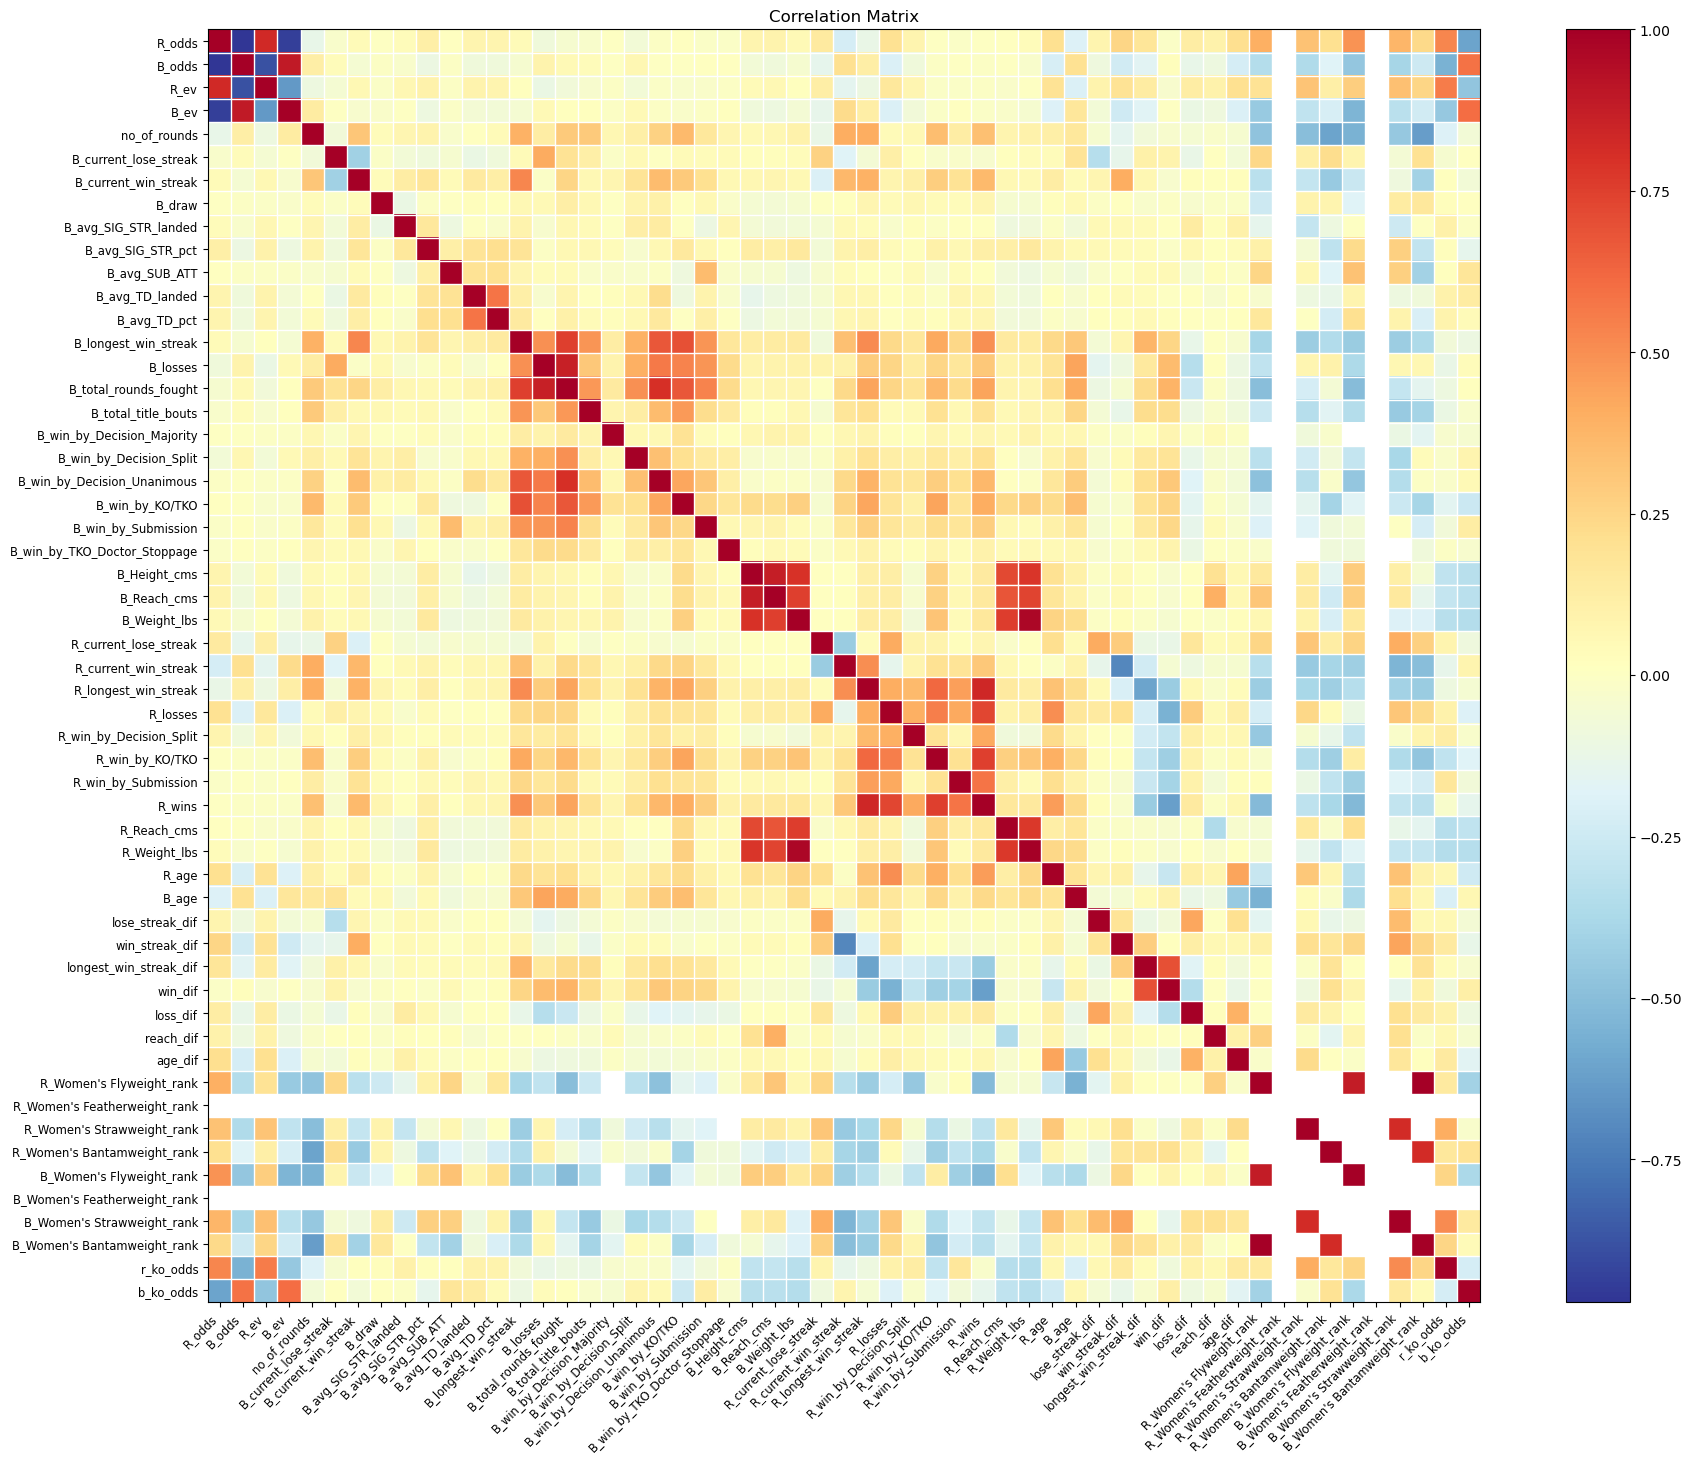

In [38]:
import statsmodels.api as sm
import seaborn as sb

figsize = (10, 5)

numeric_clean_data = clean_data.select_dtypes(include='number')
corr = numeric_clean_data.corr()
fig = sm.graphics.plot_corr(corr, xnames=list(corr.columns))

fig.set_figheight(22)
fig.set_figwidth(25)

plt.show()

<Axes: xlabel='R_age', ylabel='B_wins'>

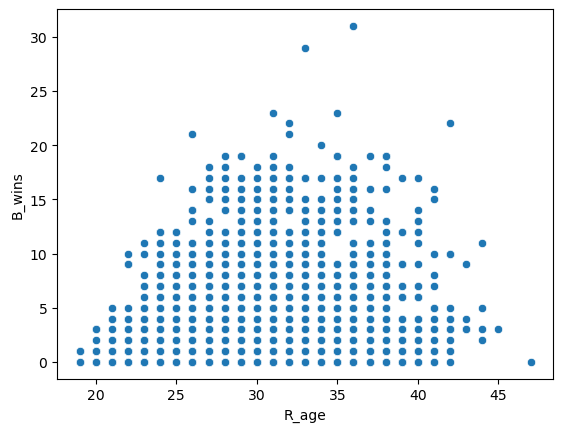

In [39]:
sb.scatterplot(data=data, x= 'R_age', y='B_wins',)

<Axes: xlabel='B_age', ylabel='R_wins'>

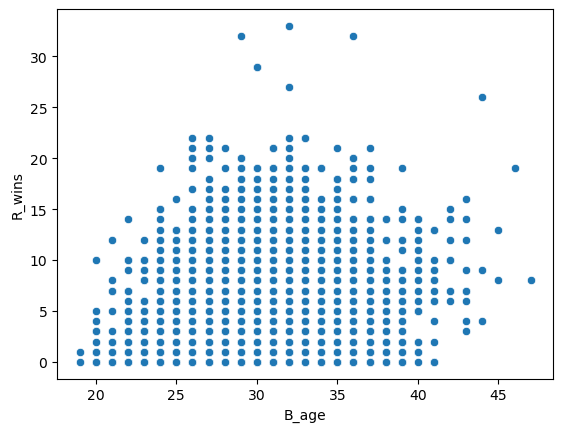

In [40]:
sb.scatterplot(data=data, x= 'B_age', y='R_wins',)

In [41]:
bins =[-9, -7, -5, -3, -1, 0, 1, 3, 5, 7, 9]  
names = ['diferencia_alta_R','diferencia_media-alta_R','diferencia_media_R','diferencia_normal_R','poca_diferencia_R','poca_diferencia_B','diferencia_normal_B','diferencia_media_B','diferencia_media-alta_B','diferencia_alta_B']
data['reach_dif_clsf'] = pd.cut(data['reach_dif'], bins, labels = names)

In [42]:
data2= data[['age_dif', 'reach_dif','no_of_rounds','win_dif','win_streak_dif','lose_streak_dif','Winner','reach_dif_clsf']]
data2.head()

,age_dif,reach_dif,no_of_rounds,win_dif,win_streak_dif,lose_streak_dif,Winner,reach_dif_clsf
0,-8,15.24,5,-8,1,-3,Red,NaN
1,-1,0.00,3,-5,0,0,Blue,poca_diferencia_R
2,-2,0.00,3,3,0,0,Blue,poca_diferencia_R
3,3,-5.08,3,-4,0,0,Red,diferencia_media-alta_R
4,5,-5.08,3,1,-2,0,Blue,diferencia_media-alta_R


<Axes: title={'center': 'Distribución de alcance'}, ylabel='count'>

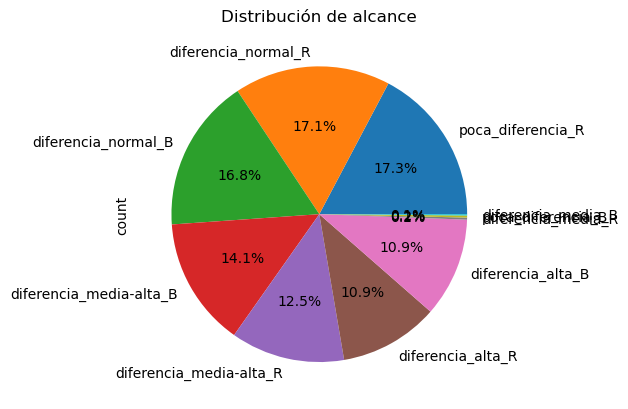

In [43]:
data.value_counts('reach_dif_clsf')/4896*100

data['reach_dif_clsf'].value_counts().plot(kind='pie',autopct='%.1f%%', title='Distribución de alcance')

<Axes: title={'center': 'Tipos de alcances mas comunes'}, xlabel='reach_dif_clsf'>

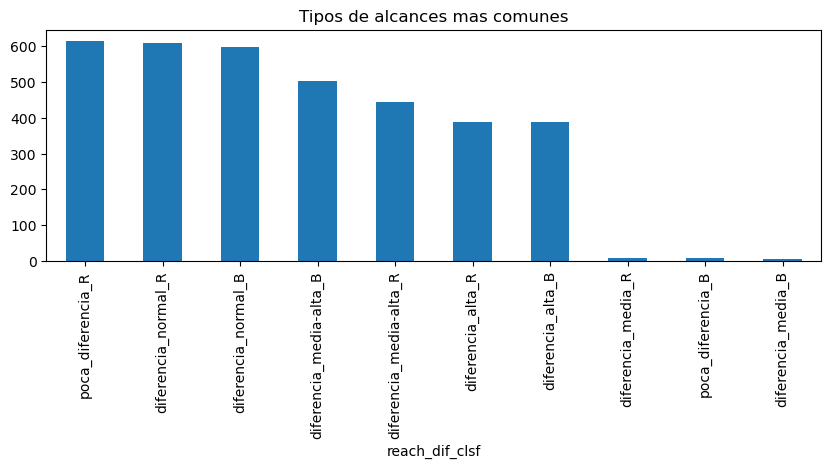

In [44]:
data['reach_dif_clsf'].value_counts().plot(kind='bar', title='Tipos de alcances mas comunes',figsize=(10,3))

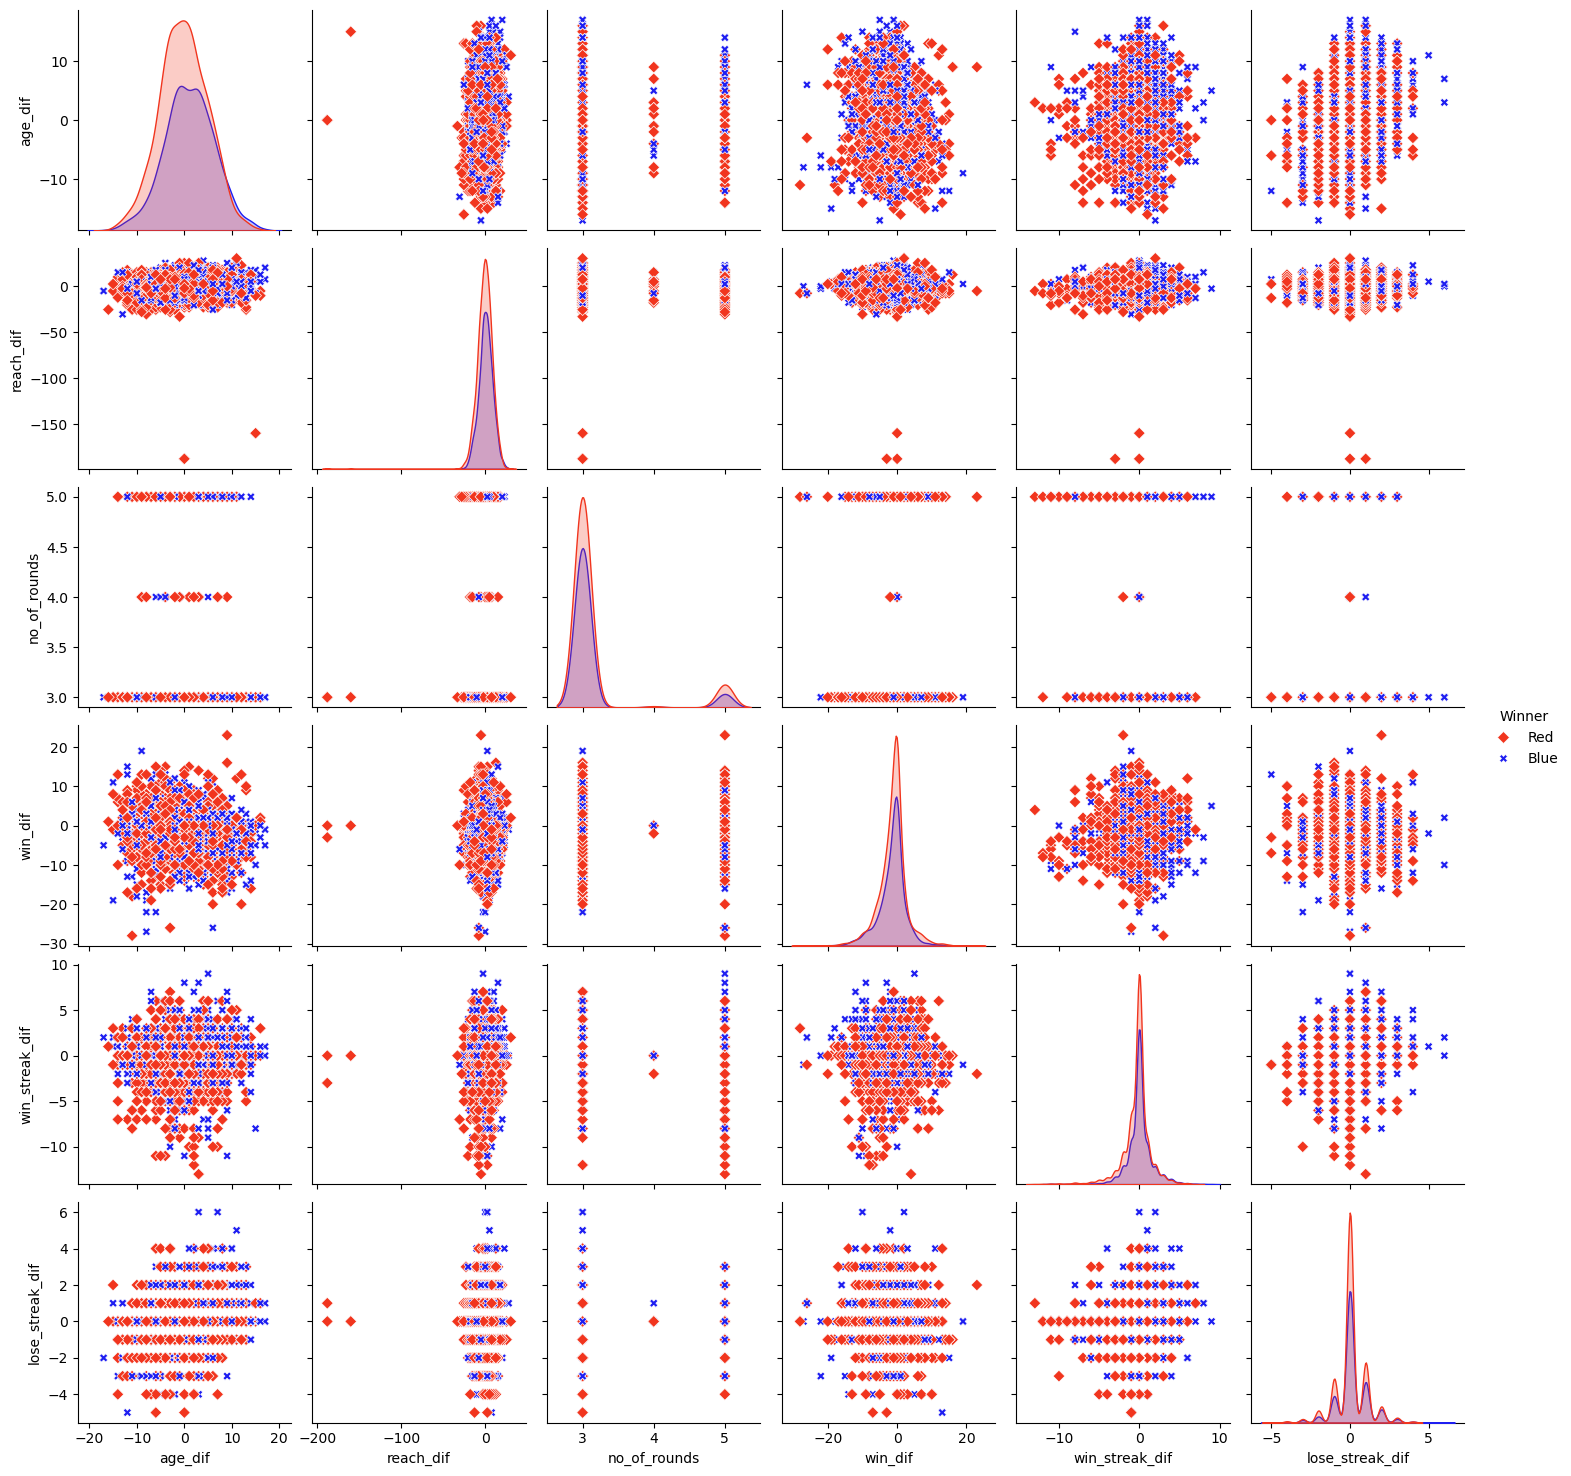

In [45]:
sb.pairplot(data2, hue = 'Winner',markers=['D', 'X'],palette=dict(Blue='#1E1EF1', Red='#F1351E'))

In [46]:
date_sr = pd.to_datetime(clean_data['date'], errors='coerce', dayfirst=False)
year = date_sr.dt.year
valid_idx = date_sr.notna()
year = year[valid_idx]
eje_y = clean_data.loc[valid_idx, 'B_total_title_bouts']

In [47]:
# Parse the date column robustly
date_sr = pd.to_datetime(data['date'], errors='coerce', dayfirst=False)
data['year'] = date_sr.dt.year

# Count title fights by year
title_fights_by_year = data.groupby('year')['B_total_title_bouts'].sum()

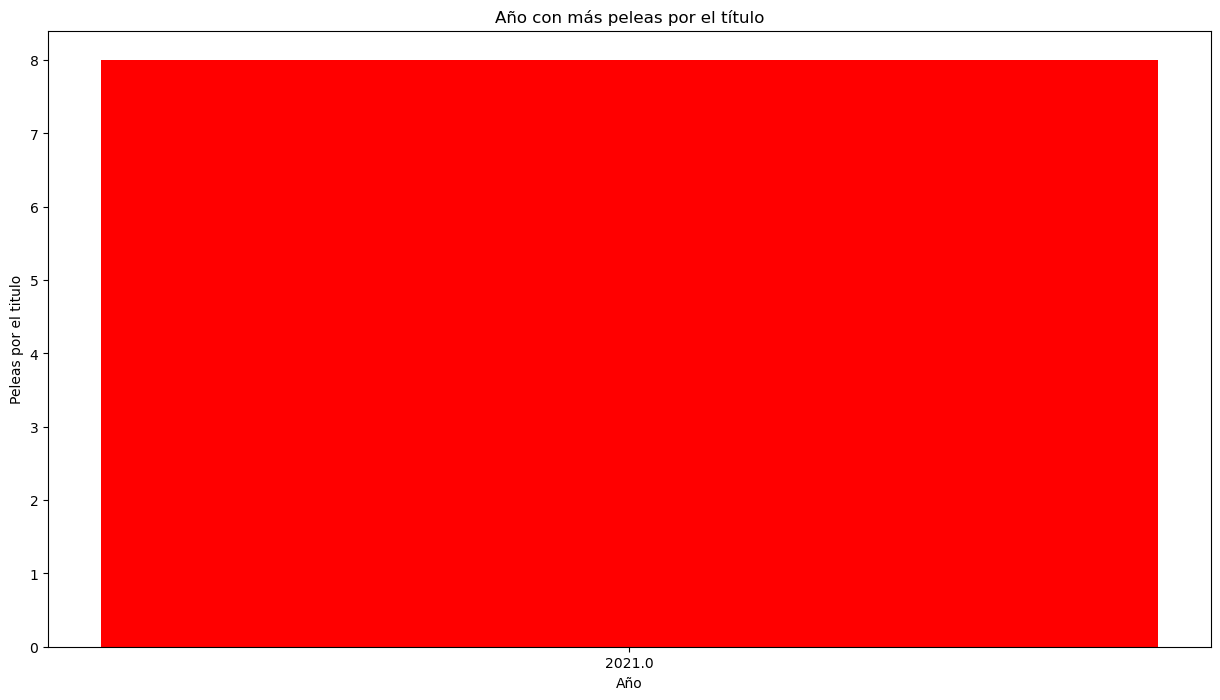

In [48]:
# Create the bar plot
plt.figure(figsize=(15, 8))
plt.bar(title_fights_by_year.index.astype(str), title_fights_by_year.values, color="red")

# Labels and title
plt.ylabel('Peleas por el titulo')
plt.xlabel('Año')
plt.title('Año con más peleas por el título')

plt.show()

# Variables de poca confianza

<Axes: >

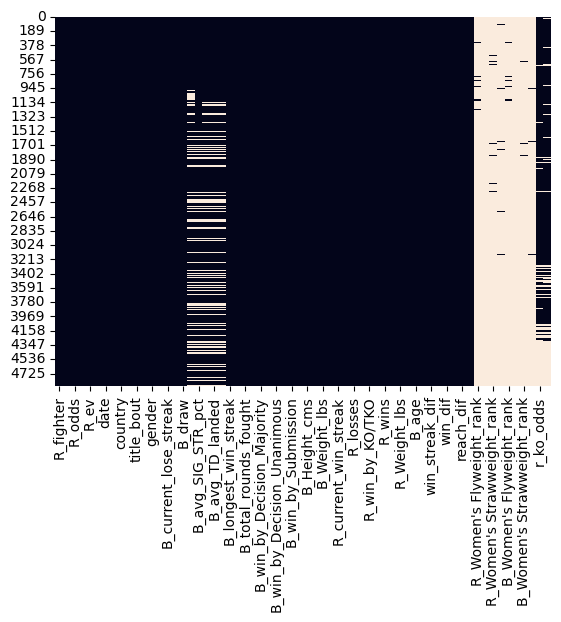

In [50]:
sb.heatmap(clean_data.isnull(), cbar=False)

1.   B_draw
2.   B_avg_SIG_pct
3.   B_avg_TD_landed
4.   B_avg_SIG_STR_landed
1.   B_avg_SUB_ATT
2.   B_avg_TD_pct








<Axes: >

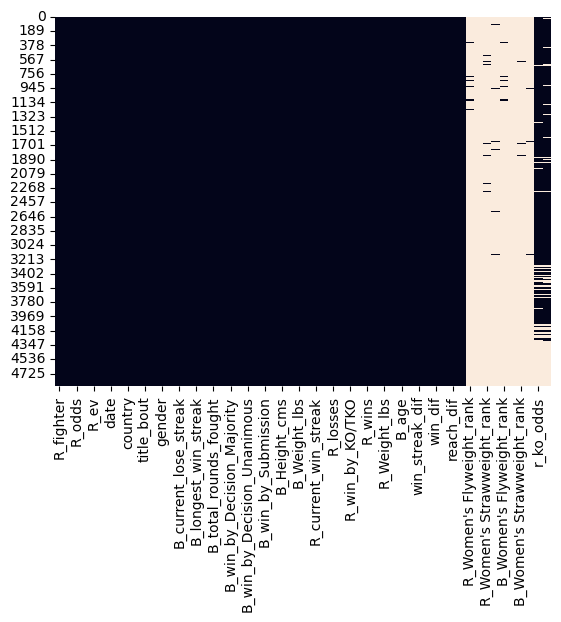

In [51]:
perfect_clean_data = clean_data.drop(['B_draw','B_avg_TD_landed','B_avg_SIG_STR_landed','B_avg_SUB_ATT','B_avg_TD_pct','B_avg_SIG_STR_landed','B_avg_SIG_STR_pct'], axis=1)
sb.heatmap(perfect_clean_data.isnull(), cbar=False)